# Distribution

Student names: Justin van Egmond, Noor Verbrugge & Douwe Maljers

Team number: 32

In [1]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact, widgets, HBox, VBox, Layout, interactive_output
import pycountry

csv_path = "IHME_mental_real.csv"
df2 = pd.read_csv(csv_path)

def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

df2["iso_alpha"] = df2["location"].apply(get_iso3)

# missing_iso = df2[df2["iso_alpha"].isna()]["location"].unique()
# print("Ontbrekende ISO3 codes:", missing_iso)

df2["val_display"] = df2.apply(lambda row: row["val"] * 100 if row["metric"] == "Percent" else row["val"], axis=1)

years = sorted(df2["year"].unique())
sexes = sorted(df2["sex"].unique())
metrics = sorted(df2["metric"].unique())

def plot_map(year, sex, metric):
    dff = df2[(df2["year"] == year) & (df2["sex"] == sex) & (df2["metric"] == metric)]
    if dff.empty:
        print("Geen data voor deze combinatie")
        return
    
    if metric == "Percent":
        color_range = [0, 20] # HARDCODE AANPASSEN
    else:
        color_range = [df2["val_display"].min(), df2["val_display"].max()]
    
    fig = px.choropleth(
        dff,
        locations="iso_alpha",
        color="val_display",
        hover_name="location",
        color_continuous_scale="Reds",
        range_color=color_range,
        labels={"val_display": f"Prevalentie ({metric})"},
        title=f"Mental disorders - {sex} - {metric} - {year}"
    )
    fig.update_layout(
        geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
        width=900,
        height=600,
        margin={"r":0,"t":40,"l":0,"b":0}
    )
    fig.show()

year_slider = widgets.SelectionSlider(options=years, description="Jaar", continuous_update=False, layout=Layout(width='35%'))
sex_dropdown = widgets.Dropdown(options=sexes, description="Sekse", layout=Layout(width='150px'))
metric_dropdown = widgets.Dropdown(options=metrics, description="Metric", layout=Layout(width='150px'))

ui_top = HBox([sex_dropdown, metric_dropdown], layout=Layout(justify_content='flex-end', width='350px'))
ui = VBox([ui_top, year_slider])

out = widgets.Output()

def on_change(change):
    with out:
        out.clear_output(wait=True)
        plot_map(year_slider.value, sex_dropdown.value, metric_dropdown.value)

year_slider.observe(on_change, names='value')
sex_dropdown.observe(on_change, names='value')
metric_dropdown.observe(on_change, names='value')

display(ui, out)

with out:
    plot_map(years[0], sexes[0], metrics[0])


FileNotFoundError: [Errno 2] No such file or directory: 'IHME_mental_real.csv'

> *Figuur 1: Interactieve kaart van wereldwijde cijfers over mentale klachten.*

## Introductie

Het gebruik van sociale media is de laatste jaren in enorm tempo toegenomen. Alhoewel het gebruik van sociale media de mogelijkheid biedt voor voorbending en entertainment, echter lijkt het gebruik hiervan ook een keerzijde te hebben. Tal van studies tonen aan dat excessief sociale media gebruik samenhangt met verminderde mentale gezondheid. Zo leggen studies het verband tussen sociale mediaverslaving en mentale problemen, als depressie en angststoornissen (Ergün et al., 2023). Desalniettemin zijn er ook studies die het overtuigt zijn, dat dit verband in werkelijk niet bestaat. Zo concludeert Huang (2018) uit een meta-analyse dat het bestaan van dit verband te snel wordt getrokken en dubieus van aard is. 
Nadat er vanuit artsen, wetenschappers en deskundigen een brandbrief werd verstuurd met een oproep tot regelgeving omtrent smartphone bezit en sociale media gebruik, komt de Nederlandse politiek binnenkort met een richtlijn omtrent dit  (NOS, 2025). In hoeverre is de invoering van deze richtlijnen terecht? Zijn richtlijnen alleen voor kinderen nodig of mooeten deze voor de hele samenleving gelden?

Wereldwijd is de populatie met mentale stoornissen significant gestegen. In de grafiek boven is per land de trend te zien. Vandaar dat dit onderzoek nog meer van belang is. Vrouwen en mannen zijn beide slachtoffer van deze chronische ziekte. 

In dit onderzoek worden beide standpunten onderbouwd aan de hand van data visualisaties, specifiek gericht op sociale mediaverslaving onder studenten. Dit wordt gedaan met behulp van verschillende datasets van diverse groepen studenten. Tevens wordt een dataset van het Institute for Health Metrics and Evaluation gebruikt om de grootschaligheid van het wereldwijde probleem van mentale stoornissen en verminderde mentale gesteldheid in kaart te brengen.

## Dataset and Preprocessing

Voor ons onderzoek hebben we veel achtergrond informatie opgezocht om de juiste data te vinden. In veel datasets omtremd mentale gezondheid zijn simulaties gebruikt en gegevens nagebootst. Om nuttige correlaties te vinden in de variabelen hebben we elke set goed bestudeerd of er realistische situaties zijn gebruikt. Er zijn drie datasets gebruikt. Daar is voor gekozen omdat veel goede datasets erg specifiek zijn, met consequentie dat er niet veel variabelen maar wel veel informatie te vinden is. 

De dataset van het Institute for Health Metrics and Evaluation is een dataset van de GBD (Global Burden of Disease) studie uit 2021. Deze studie is het grootste en meest uitgebreide onderzoek om gezondheidsverlies op verschillende plaatsen en in de loop van de tijd te kwantificeren. Zo vormt de gevonden data een krachtig middel om inzichten te creëren voor inzichten omtrent globale gezondheidstrends en -uitdagingen (Global Burden of Disease (GBD), n.d.). De dataset is gevonden via https://vizhub.healthdata.org/gbd-results/ , waar de data gefilterd kan worden naar de schattingen van de prevalentie, of andere statistieken, mentale stoornissen.

De dataset Social Media Addiction vs. Relationship is afkomstig van Kaggle. Deze specifieke dataset brengt de mogelijke verbanden in kaart tussen sociale media gebruik, verslavingskenmerken en de kwaliteit van sociale relaties. De gegevens zijn verzameld via een online enquête en bevatten variabelen zoals de frequentie van socialmediagebruik, ervaren afhankelijkheid, relationele conflicten en emotionele beschikbaarheid. Dit biedt onderzoekers een toegankelijke bron voor het verkennen van hedendaagse digitale gedragsdynamieken binnen sociale contexten (Adil Shamim, n.d.). De dataset is beschikbaar via https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships, waar de ruwe data kan worden gedownload voor verdere kwantitatieve analyse.

De dataset Student Mental Health Survey is ook afkomstig van Kaggle en biedt inzicht in de mentale gezondheid van studenten in relatie tot factoren als academische druk, slaapgewoonten en sociale steun. De data zijn verzameld via een online vragenlijst en bevatten variabelen zoals het al dan niet zoeken van psychologische hulp, ervaren stressniveaus en copingmechanismen. De dataset vormt een toegankelijke bron voor het analyseren van trends in studentenwelzijn en kan bijdragen aan beleidsvorming of interventieontwikkeling binnen het hoger onderwijs (Abdullah Ashfaq Virk, n.d.). De gegevens zijn te vinden via https://www.kaggle.com/datasets/abdullahashfaqvirk/student-mental-health-survey, waar ze direct beschikbaar zijn voor download en verdere analyse.





## Het gebruik van sociale media veroorzaakt diverse problemen

In het dagelijks gebruik zijn sociale media niet weg te krijgen. Het is een nieuwe norm geworden, wanneer men iets ziet dat te delen online. Vroeger had men vooral contact als ze elkaar fysiek zagen. Dat geeft ook een druk op mensen om altijd beschikbaar te zijn. In die tijd zouden ze eigenlijk met andere dingen bezig moeten zijn. Hun aandacht, focus en behoeftes worden geschoven, wat zorgt voor een verschuiving in prioriteiten. Een argument daarbij is dan ook dat het gebruik van sociale media diversie problemen veroorzaakt, zoals slechter presteren op school, slaapproblemen en internetverslaving.


### Schoolprestatie

Studenten zijn al langer bekend om gevoelig te zijn voor mentale stoornissen. Door hoge studielast, sociale druk en financiële moeilijkheden staan zijn erg onder druk. Ook zijn jongeren meer actief op sociale media en worden daardoor ook beïnvloed. Veel studenten geven aan dat hun studieprestaties negatief worden beïnvloed door sociale media. Studenten die aangeven academisch beïnvloed te worden, gebruiken sociale media vaker. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
import os

import kagglehub

# Download latest version
path = kagglehub.dataset_download("adilshamim8/social-media-addiction-vs-relationships")

print("Path to dataset files:", path)
csv_path = os.path.join(path, "Students Social Media Addiction.csv") 
df4 = pd.read_csv(csv_path)
# df1 = pd.read_csv("Mental Health Dataset1.csv")
# df2 = pd.read_csv("mental_health_diagnosis_treatment_2.csv")
# df3 = pd.read_csv("Mental health Depression disorder Data3.csv")
# df4 = pd.read_csv("Students Social Media Addiction4.csv")

# Algemene stijl
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

plt.figure()
sns.boxplot(
    data=df4,
    x="Affects_Academic_Performance",
    y="Avg_Daily_Usage_Hours",
    palette="coolwarm"
)
plt.title("Dagelijks gebruik vs. invloed op academische prestaties")
plt.xlabel("Beïnvloedt academische prestaties?")
plt.ylabel("Gemiddelde gebruiksuren")
plt.tight_layout()
plt.show()

Path to dataset files: /Users/justin_v_egmond/.cache/kagglehub/datasets/adilshamim8/social-media-addiction-vs-relationships/versions/3


> *Figuur 2: De correlatie tussen het de gemiddelde gebruiksuren van sociale media en of de student vind dat de acadmische prestatie worden beïnvloed.*

In de tekst boven is de data te zien van studenten die aangeven of hun academische prestaties worden aangetast door het overmatig gebruik van sociale media. In de linker kolom is een significant hoger aantal studenten te zien die wel vindt dat zijn of haar scores minderen. Uit zelf reflectie is een punt te halen dat sociale media een probleem is en niet een vrijwillige actie is. De mentale gezondheid van de student kan hier ook onder lijden door de algoritmes van de apps.

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Laad data
df = pd.read_csv("MentalHealthSurvey.csv")

# Schoon CGPA-categorieën op
df['cgpa'] = df['cgpa'].str.strip()

# Relevante mentale gezondheidsdimensies
mental_columns = ['depression', 'anxiety', 'isolation', 'future_insecurity', 'academic_pressure']

# Bereken gemiddelden per CGPA-groep
grouped = df.groupby('cgpa')[mental_columns].mean()

# Sorteer in logische volgorde
cgpa_order = ['<2.5', '2.5-3.0', '3.0-3.5', '3.5-4.0']
grouped = grouped.loc[[g for g in cgpa_order if g in grouped.index]]

# Maak radar chart
fig = go.Figure()

for cgpa in grouped.index:
    fig.add_trace(go.Scatterpolar(
        r=grouped.loc[cgpa].values,
        theta=mental_columns,
        fill='toself',
        name=f'CGPA {cgpa}'
    ))

fig.update_layout(
    title='Mentale Gezondheid per CGPA-groep',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 5]
        )
    ),
    showlegend=True
)

fig.show()



> *Figuur 3: Weergave van de effecten van verschillende effecten op de gemiddeld behaalde cijfers van studenten.*

Zoals eerder benoemd heeft academische druk niet alleen gevolgen op de academische scores maar ook de mentale gezondheid van studenten. Studenten die meer werken voor hoge cijfers hebben sneller last van mentale klachten zoals depressie en stress. Ook is af te lezen dat studenten lagere cijfers sneller geneigd zijn om onzeker te zijn. De studententijd is een tijd waar mensen zich kunnen ontwikkelen en groeien tot de persoon die ze met zelfverzekerheid willen worden. Ook is de prestatiedruk voor studenten met lage cijfer immens hoog.

### Mentale gezondheid

Daarnaast scoren studenten met een hoger dagelijks gebruik vaak lager op mentale gezondheid en slapen zij minder. Meer gebruik hangt vaak samen met een lagere mentale gezondheidsscore 

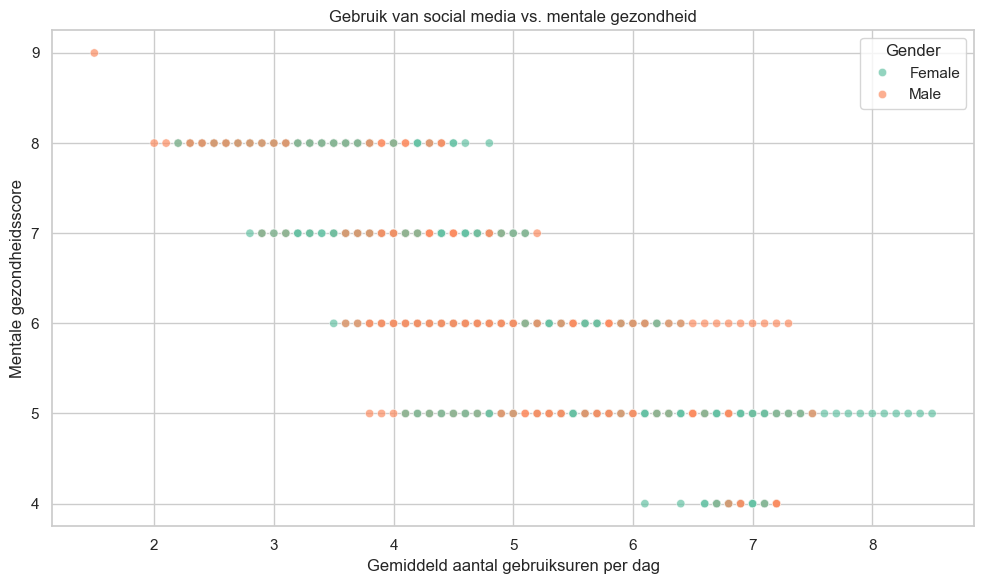

In [ ]:
plt.figure()
sns.scatterplot(
    data=df4,
    x="Avg_Daily_Usage_Hours",
    y="Mental_Health_Score",
    hue="Gender",
    alpha=0.7,
    palette="Set2"
)
plt.title("Gebruik van social media vs. mentale gezondheid")
plt.xlabel("Gemiddeld aantal gebruiksuren per dag")
plt.ylabel("Mentale gezondheidsscore")
plt.tight_layout()
plt.show()

> *Figure 4: Gebruik van sociale media en de mentale gezondheid van mannen en vrouwen.*

Uit de bovenstaande grafiek is een directe lijn te trekken tussen het gemiddeld aantal gebruiksuren en de mentale gezondheidsscore. Daar is op te merken dat bij de mensen die weinig op sociale media zitten een positievere mentale gezondheid hebben. Ook juist meer uren op sociale media resulteren in een negatiever zeflbeeld.

# Verslavingsscore

Er is ook een duidelijk verband tussen hogere verslavingsscores en meer interpersoonlijke conflicten. Meer conflicten over sociale media gaan gepaard met hogere verslavingsscores 


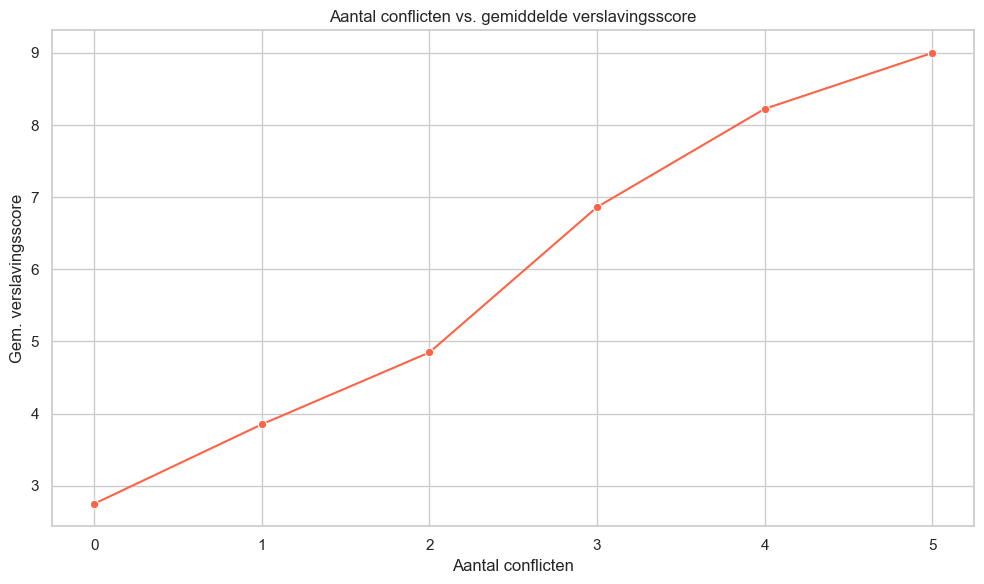

In [ ]:
conflict_addiction = df4.groupby("Conflicts_Over_Social_Media")["Addicted_Score"].mean().reset_index()

plt.figure()
sns.lineplot(
    data=conflict_addiction,
    x="Conflicts_Over_Social_Media",
    y="Addicted_Score",
    marker="o",
    color="tomato"
)
plt.title("Aantal conflicten vs. gemiddelde verslavingsscore")
plt.xlabel("Aantal conflicten")
plt.ylabel("Gem. verslavingsscore")
plt.tight_layout()
plt.show()

> *Figure 5: Aantal conflicten en de verslavingsore.*

## Niet alle studenten worden even sterk beïnvloed

Sommige studenten slagen erin sociale media op een verantwoorde of zelfs positieve manier te gebruiken. Het gebruikspatroon verschilt per platform, en studenten uit verschillende leeftijdsgroepen tonen uiteenlopende verslavingsscores. Interessant genoeg melden sommige studenten met een hoog gebruik nog steeds een goede slaap en mentale gezondheid.


### Gebruikspatronen verschillen sterk per platform 

Niet alle social media apps zijn voor alle leeftijdsgroepen gemaakt. Daardoor zal het effect wat een bepaalde app heeft zeer verschillen bij de jongeren dan bij ouderen. Algoritmes zijn gemaakt om mensen verslaafd te maken aan hun app en de ene heeft dat beter dan de ander.

/var/folders/bf/gcjsn1cs1gdch6132wf_tnmh0000gn/T/ipykernel_7117/2515751981.py:8: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/var/folders/bf/gcjsn1cs1gdch6132wf_tnmh0000gn/T/ipykernel_7117/2515751981.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




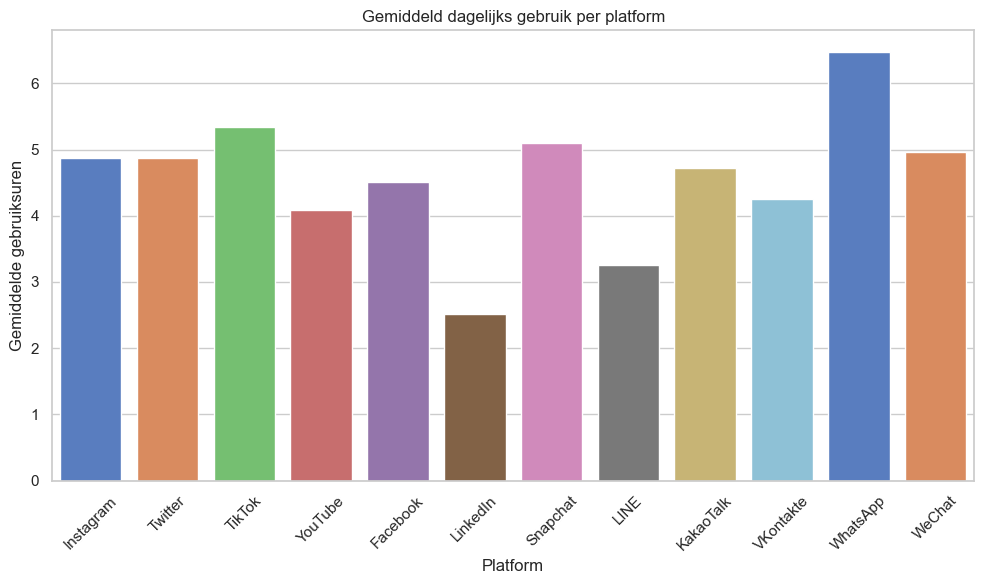

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import pandas as pd

plt.figure()
sns.barplot(
    data=df4,
    x="Most_Used_Platform",
    y="Avg_Daily_Usage_Hours",
    estimator=mean,
    ci=None,
    palette="muted"
)
plt.title("Gemiddeld dagelijks gebruik per platform")
plt.xlabel("Platform")
plt.ylabel("Gemiddelde gebruiksuren")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> *Figure 6: Verschillen per app in hoeveel uren worden besteed.*

Significant op te merken is dat Whatsapp hier boven uit steekt. Een app die vooral en alleen gemaakt is om gesprekken te hebben met naasten. Geen foto's of video's van vreemden. Echter allen contact met bekenden. Daar is geen algoritme voor nodig. 

###  ⁠Leeftijdsgroepen tonen variatie in gemiddelde verslavingsscores 

Sed ut perspiciatis unde omnis iste natus error sit voluptatem accusantium doloremque laudantium, totam rem aperiam, eaque ipsa quae ab illo inventore veritatis et quasi architecto beatae vitae dicta sunt explicabo. Nemo enim ipsam voluptatem quia voluptas sit aspernatur aut odit aut fugit, sed quia consequuntur magni dolores eos qui ratione voluptatem sequi nesciunt.

/var/folders/bf/gcjsn1cs1gdch6132wf_tnmh0000gn/T/ipykernel_7117/1460079685.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




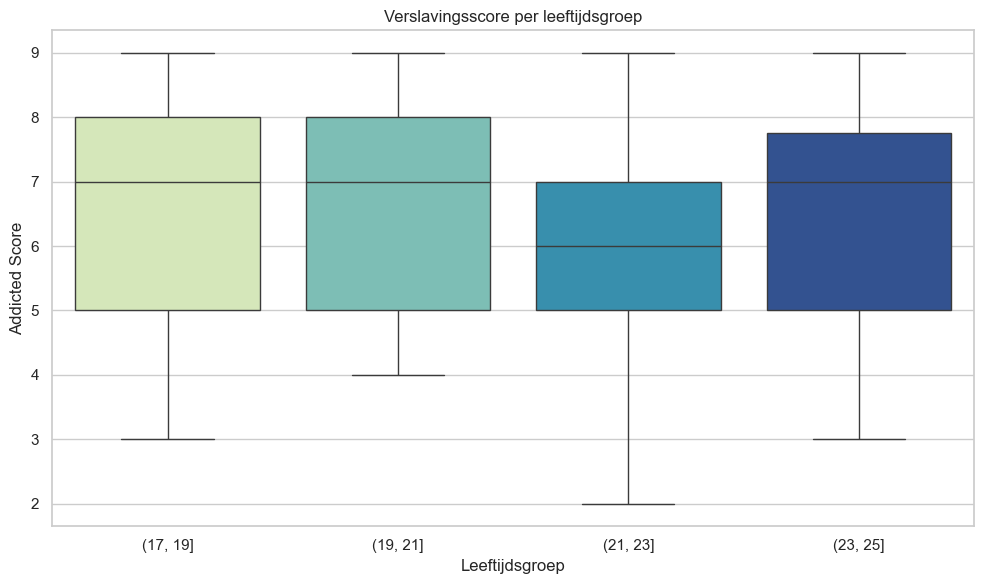

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import plotly.colors as colors

plt.figure()
sns.boxplot(
    data=df4,
    x=pd.cut(df4["Age"], bins=[17, 19, 21, 23, 25]),
    y="Addicted_Score",
    palette="YlGnBu"
)
plt.title("Verslavingsscore per leeftijdsgroep")
plt.xlabel("Leeftijdsgroep")
plt.ylabel("Addicted Score")
plt.tight_layout()
plt.show()

> *Figure 7: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*

### Sommige intensieve gebruikers hebben toch gezonde slaapgewoonten 

In enim justo, rhoncus ut, imperdiet a, venenatis vitae, justo. Nullam dictum felis eu pede mollis pretium. Integer tincidunt. Cras dapibus. Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.

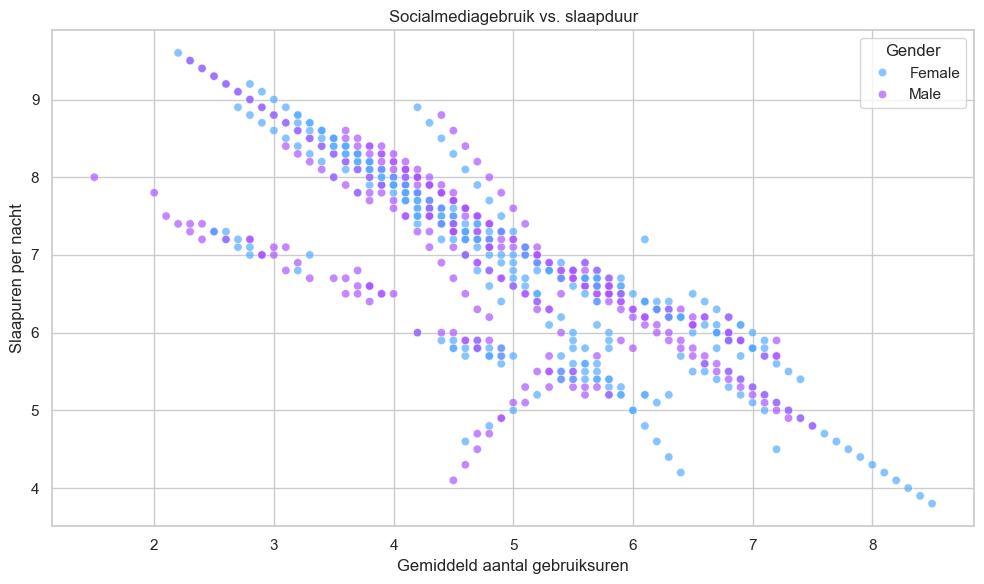

In [ ]:

import pandas as pd
import plotly.express as px
import random


plt.figure()
sns.scatterplot(
    data=df4,
    x="Avg_Daily_Usage_Hours",
    y="Sleep_Hours_Per_Night",
    hue="Gender",
    alpha=0.7,
    palette="cool"
)
plt.title("Socialmediagebruik vs. slaapduur")
plt.xlabel("Gemiddeld aantal gebruiksuren")
plt.ylabel("Slaapuren per nacht")
plt.tight_layout()
plt.show()

> *Figure 8: Verschil per geslacht over gebruiksuren en slaapuren.*

## Reflection



## Work Distribution



## Referenties


Ergün, N., Özkan, Z., & Griffiths, M. D. (2023). Social Media Addiction and Poor Mental Health: Examining the mediating roles of internet addiction and phubbing. Psychological Reports. https://doi.org/10.1177/00332941231166609 

Global Burden of Disease (GBD). (n.d.). Institute for Health Metrics and Evaluation. https://www.healthdata.org/research-analysis/gbd

Huang, C. (2017). Time spent on social network sites and Psychological Well-Being: A Meta-Analysis. Cyberpsychology Behavior and Social Networking, 20(6), 346–354. https://doi.org/10.1089/cyber.2016.0758

NOS Nieuws & NOS Nieuws. (2025, June 16). Kabinet: geen sociale media onder 15 jaar, smartphone vanaf groep 8. NOS. https://nos.nl/artikel/2571382-kabinet-geen-sociale-media-onder-15-jaar-smartphone-vanaf-groep-8

## Appendix

Generative AI (ChatGPT with GPT 3.5) is used to facilitate the creation of this document, as shown in the table below.

| Reasons of Usage | In which parts? | Which prompts were used? |
| ------------------------ | --------------------------------- | -------------------------------------------- |
| Brainstorm research questions and identify keywords for further search | The entire project framing | "Give keywords about the current debate in climate change with brief explanations" |
| Improve writing clarity and enhance readability | All sections | "Edit the following text to make it more clear. Do not alter the meaning." |
| Enhance readability | All sections | "Revise the paragraph to improve readability." |
| Ensure grammatical accuracy |  All sections | "Correct any grammatical errors in the text." |
| Provide alternative phrasing | Descriptions of the perspectives | "Suggest alternative phrases for better clarity." |
| Optimize sentence structure | All sections | "Restructure the sentence for better flow." |
| Condense lengthy sentences | All sections | "Simplify the following sentences without losing important information."|

> *Table 1: Usage of generative AI to facilitate the creation of this document.*